In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import torch
from chronos import ChronosPipeline

In [14]:
import pandas as pd
import numpy as np

# Define date range for monthly frequency
date_range = pd.date_range(start='2023-01-01', end='2024-12-31', freq='M')

# Generate trends
np.random.seed(42)  # for reproducibility

# Generate upward trend data
er_visits = np.linspace(50, 300, num=len(date_range)) + np.random.randint(-10, 10, size=len(date_range))
re_admissions = np.linspace(10, 60, num=len(date_range)) + np.random.randint(-5, 5, size=len(date_range))
length_of_stay = np.linspace(2, 15, num=len(date_range)) + np.random.uniform(-1, 1, size=len(date_range))
number_of_procedures = np.linspace(1, 30, num=len(date_range)) + np.random.randint(-2, 2, size=len(date_range))

# Generate downward trend data
patient_satisfaction_score = np.linspace(5, 1, num=len(date_range)) + np.random.uniform(-0.5, 0.5, size=len(date_range))

# Clip values to ensure they remain within a realistic range
er_visits = np.clip(er_visits, 50, 300)
re_admissions = np.clip(re_admissions, 10, 60)
length_of_stay = np.clip(length_of_stay, 2, 15)
number_of_procedures = np.clip(number_of_procedures, 1, 30)
patient_satisfaction_score = np.clip(patient_satisfaction_score, 1, 5)

data = {
    'Date': date_range,
    'ER_visits': er_visits,
    'Re_admissions': re_admissions,
    'Length_of_stay': length_of_stay,
    'Patient_satisfaction_score': patient_satisfaction_score,
    'Number_of_procedures': number_of_procedures
}

# Create DataFrame
df = pd.DataFrame(data)

# Display the first few rows of the DataFrame
print(df.head())

# Save DataFrame to a CSV file
df.to_csv('health_care_data_2023_2024.csv', index=False)

        Date  ER_visits  Re_admissions  Length_of_stay  \
0 2023-01-31  50.000000      10.000000        2.818641   
1 2023-02-28  69.869565      13.173913        2.082777   
2 2023-03-31  75.739130      12.347826        3.455479   
3 2023-04-30  82.608696      19.521739        3.319074   
4 2023-05-31  90.478261      15.695652        4.301006   

   Patient_satisfaction_score  Number_of_procedures  
0                    4.615869              1.000000  
1                    5.000000              1.000000  
2                    4.775472              1.521739  
3                    4.309159              2.782609  
4                    3.867906              6.043478  


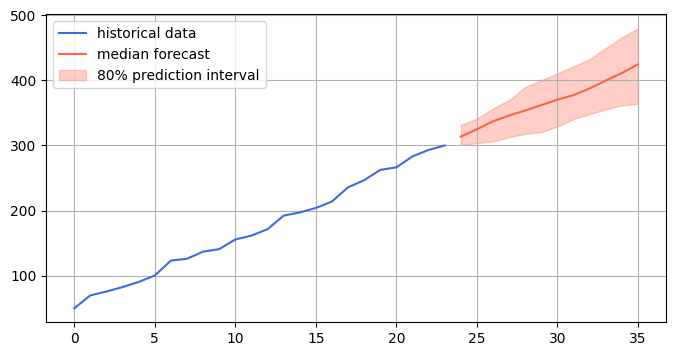

In [16]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import torch
from chronos import ChronosPipeline

pipeline = ChronosPipeline.from_pretrained(
  "amazon/chronos-t5-tiny",
  device_map="cpu",
  torch_dtype=torch.bfloat16,
)

df = pd.read_csv('health_care_data_2023_2024.csv')
df = df[['Date', 'ER_visits']]

# context must be either a 1D tensor, a list of 1D tensors,
# or a left-padded 2D tensor with batch as the first dimension
context = torch.tensor(df["ER_visits"])
prediction_length = 12
forecast = pipeline.predict(context, prediction_length)  # shape [num_series, num_samples, prediction_length]

# visualize the forecast
forecast_index = range(len(df), len(df) + prediction_length)
low, median, high = np.quantile(forecast[0].numpy(), [0.1, 0.5, 0.9], axis=0)

plt.figure(figsize=(8, 4))
plt.plot(df["ER_visits"], color="royalblue", label="historical data")
plt.plot(forecast_index, median, color="tomato", label="median forecast")
plt.fill_between(forecast_index, low, high, color="tomato", alpha=0.3, label="80% prediction interval")
plt.legend()
plt.grid()
plt.show()
